In [ ]:
%cd /content/drive/MyDrive/AI/FutureBaseOnBiometrics/

/content/drive/MyDrive/AI/FutureBaseOnBiometrics


In [ ]:
#Import các thư viện liên quan cần sử dụng
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Thư viện tạo mô hình CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical # one hot encoding

#Thư viện vẽ đồ thị
from matplotlib import pyplot as plt 

from sklearn import preprocessing
from tensorflow.keras.models import load_model
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu chứa dữ liệu dùng để training
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/FutureBaseOnBiometrics/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1458 images belonging to 6 classes.


In [ ]:
# Lấy ra tên của từng thư mục chứa từng loại dữ liệu
training_set.class_indices

{'Doctor': 0,
 'Engineer': 1,
 'Farmer': 2,
 'Policeman': 3,
 'Singer': 4,
 'Teacher': 5}

In [ ]:
#Define và compile CNN model
model=Sequential()

# Nhân tích chập 32 lần
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 64 lần 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 128 lần 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
#Complie mô hình CNN
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Lưu lại giá trị mỗi lần học để vẽ ra đồ thị
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
46/46 [==============================] - 12s 201ms/step - loss: 0.4482 - accuracy: 0.8429
Epoch 2/100
46/46 [==============================] - 10s 222ms/step - loss: 0.4155 - accuracy: 0.8580
Epoch 3/100
46/46 [==============================] - 10s 224ms/step - loss: 0.3806 - accuracy: 0.8608
Epoch 4/100
46/46 [==============================] - 10s 208ms/step - loss: 0.3936 - accuracy: 0.8580
Epoch 5/100
46/46 [==============================] - 10s 205ms/step - loss: 0.3988 - accuracy: 0.8621
Epoch 6/100
46/46 [==============================] - 10s 221ms/step - loss: 0.3775 - accuracy: 0.8594
Epoch 7/100
46/46 [==============================] - 10s 223ms/step - loss: 0.3755 - accuracy: 0.8690
Epoch 8/100
46/46 [==============================] - 10s 206ms/step - loss: 0.3594 - accuracy: 0.8752
Epoch 9/100
46/46 [==============================] - 10s 214ms/step - loss: 0.3424 - accuracy: 0.8752
Epoch 10/100
46/46 [==============================] - 10s 223ms/step - loss: 0.371

In [ ]:
#Độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.11352061480283737
Train Accuracy 0.9636488556861877


<function matplotlib.pyplot.show(close=None, block=None)>

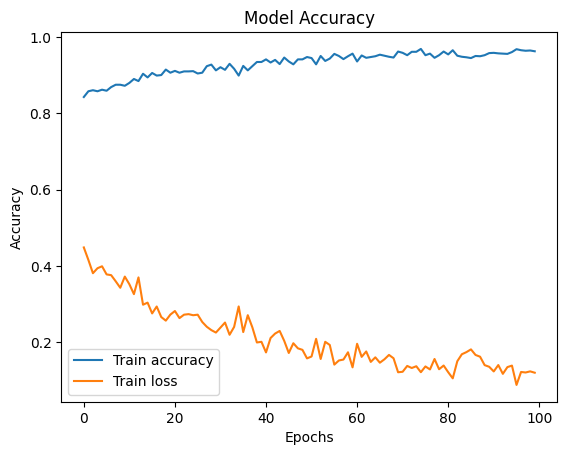

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show

In [ ]:
# Lưu lại dữ liệu sau khi train
model.save("FutureBaseOnBiometrics.h5")

In [ ]:
#Load mô hình đã lưu
model_CNN=load_model('FutureBaseOnBiometrics.h5')

1/1 [==============================] - 0s 214ms/step
Future career base on fingerprinter is  Teacher


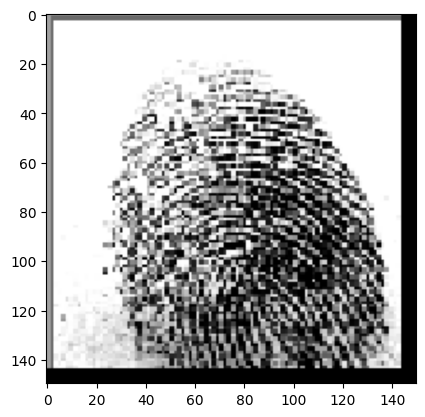

1/1 [==============================] - 0s 18ms/step
Future career base on fingerprinter is  Singer


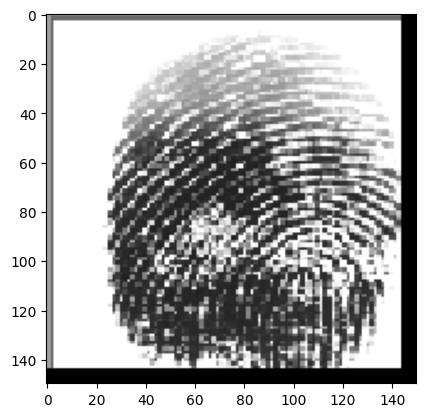

1/1 [==============================] - 0s 18ms/step
Future career base on fingerprinter is  Policeman


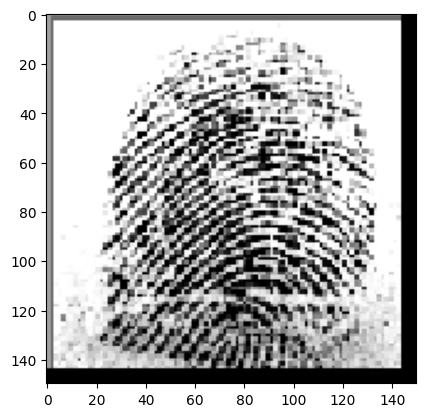

1/1 [==============================] - 0s 19ms/step
Future career base on fingerprinter is  Teacher


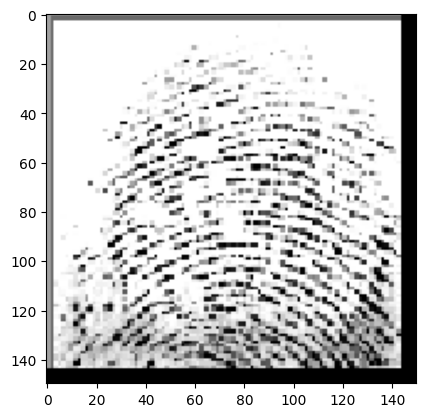

1/1 [==============================] - 0s 18ms/step
Future career base on fingerprinter is  Policeman


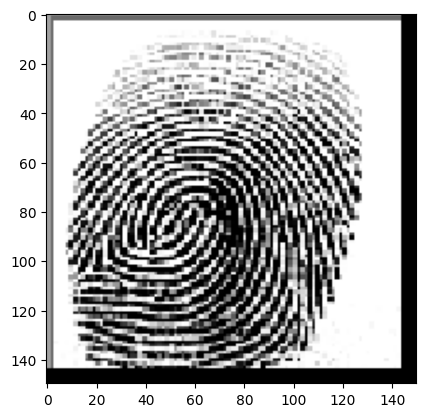

1/1 [==============================] - 0s 20ms/step
Future career base on fingerprinter is  Singer


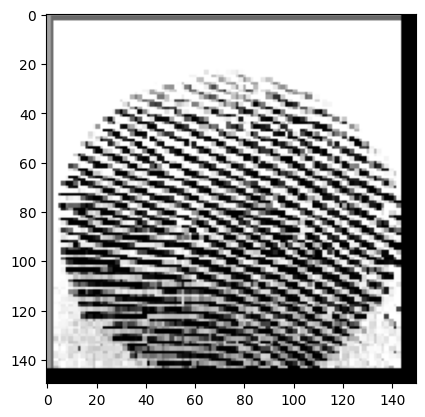

1/1 [==============================] - 0s 18ms/step
Future career base on fingerprinter is  Singer


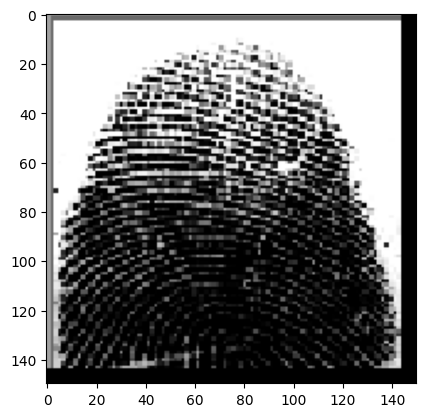

1/1 [==============================] - 0s 19ms/step
Future career base on fingerprinter is  Engineer


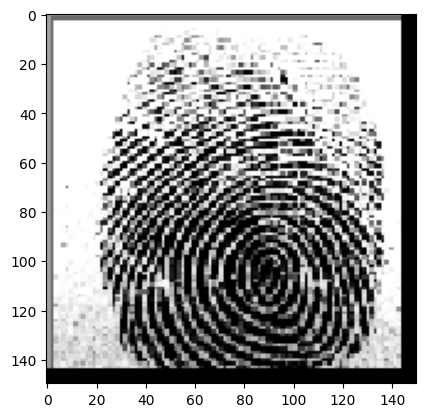

1/1 [==============================] - 0s 20ms/step
Future career base on fingerprinter is  Teacher


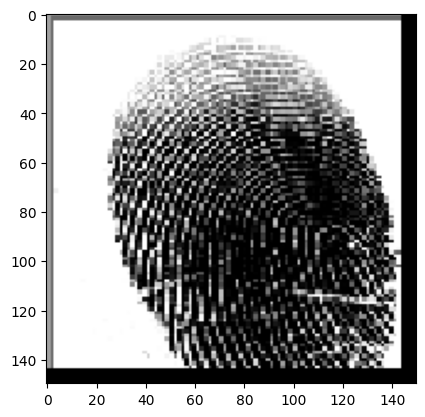

1/1 [==============================] - 0s 18ms/step
Future career base on fingerprinter is  Farmer


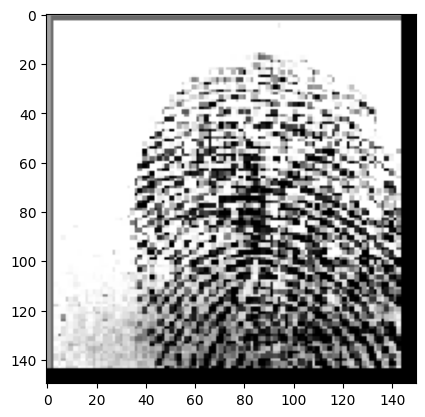

1/1 [==============================] - 0s 27ms/step
Future career base on fingerprinter is  Engineer


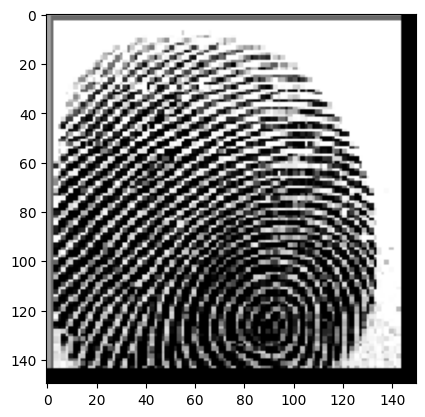

1/1 [==============================] - 0s 31ms/step
Future career base on fingerprinter is  Farmer


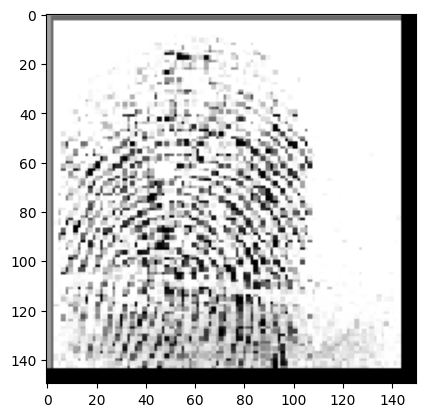

1/1 [==============================] - 0s 18ms/step
Future career base on fingerprinter is  Singer


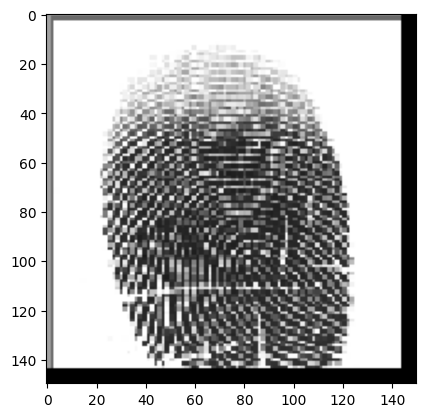

1/1 [==============================] - 0s 18ms/step
Future career base on fingerprinter is  Doctor


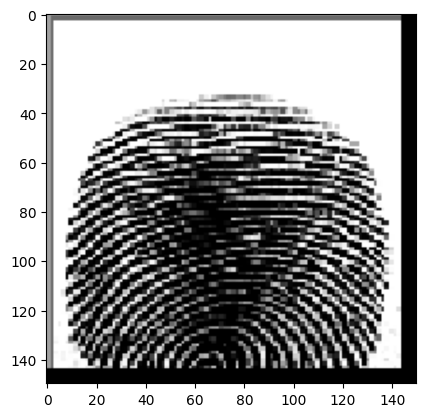

1/1 [==============================] - 0s 18ms/step
Future career base on fingerprinter is  Doctor


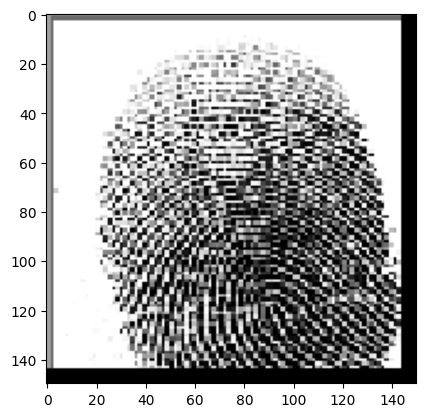

In [ ]:
#Testing
test="/content/drive/MyDrive/AI/FutureBaseOnBiometrics/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['Doctor','Engineer','Farmer','Policeman','Singer','Teacher']
  
  print("Future career base on fingerprinter is ",class_name[result])
  plt.show()